In [2]:
from solution import Solution
from basis import Basis
import numpy as np

def f_collocation_points(N):
    points = np.zeros(N+1)
    h = 2/(N+1)
    points[0] = -1 + h/2
    for i in range(1, N+1):
        points[i] = points[i-1] + h
    return np.array(points).reshape(N+1,1)
colloc_points = f_collocation_points(4)


power = 5
params = {
    'n_dims': 1,
    'dim_sizes': np.array([5]),
    'area_lims': np.array([[0,1]]),
    'power': power,
    'basis': Basis(power),
}
sol = Solution(**params)


w = (sol.steps[0]/2)

colloc_left_operators = [lambda u_loc, u_bas, x, x_loc: u_bas([4]) * (w**4)]
colloc_right_operators = [lambda u_loc, u_nei, x, x_loc: np.exp(x)*(x**4 + 14*(x**3) + 49*(x**2) + 32*x - 12) * (w**4)]
colloc_ops = [colloc_left_operators, colloc_right_operators]

border_left_operators = [lambda _, u_bas, x, x_loc: u_bas([0]), 
                            lambda _, u_bas, x, x_loc: u_bas([1]) * w]
border_right_operators = [lambda u, _, x, x_loc: 0,
                            lambda u, _, x, x_loc: 0 * w]
border_ops = [border_left_operators, border_right_operators]

#colloc_points = np.linspace(-1,1,6,endpoint=False)[1:].reshape(5,1)
connect_points = np.array([[-1], [1]])
border_points = connect_points

points = (colloc_points, connect_points, border_points)
# border_points = [-1, 1]

iteration_dict = {'points':points,
'colloc_ops':colloc_ops,
 'border_ops':border_ops}

sol.solve(verbose = True, **iteration_dict)

Iterations to converge:  61


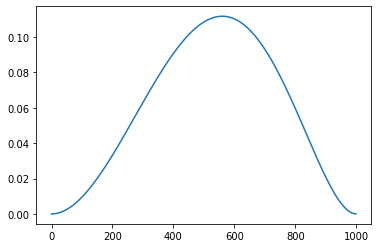

In [3]:
sol.plot()

In [4]:
from IPython.display import clear_output
for i in range(1000):
    sol.iterate_cells(**iteration_dict)
    clear_output(wait=True)
    sol.plot()

KeyboardInterrupt: 